### Showing how the dot product between two vectors (w.x) can be interpreted as the distance from a point x to the line defined by the w coefficient

###### In this case we consider the line -2x -y = 0, we call it l1. 
The vector of coefficients is  w=[-2 -1] and we calculate the distance of the point p (-0.8,0.3) to the line l1 calculating the dot product $ \hat{w} \cdot x$

In [1]:
# lets define some imports
import numpy as np
import matplotlib.pyplot as plt
from math import degrees
from matplotlib.patches  import Arc
from numpy import  sqrt,arcsin,sin,pi,cos,arccos,abs,arctan,round
from numpy.linalg import norm

In [2]:
# ... and some helper functions
def Add_Annotations():
    ''' Write some annotatioon on the graph with the hope of making it more clear
    '''
    plt.axes().annotate('len=0.5813', xy=(-0.5, 0.5), xytext=(-1.5, 1),
                arrowprops=dict(headwidth=5 ,width = 1,facecolor='black', shrink=0.02),
                )
    
    plt.axes().annotate('len=0.5813', xy=(-0.4, -0.2), xytext=(-1, -1),color='red',
                arrowprops=dict(headwidth=5,width = 1,facecolor='black', shrink=0.02)
                )
    
    plt.axes().annotate('p=-0.8,03', xy = (-1,0.5),xytext=(-1.3, 0.5))
    plt.axes().annotate('$w$', xy = (-0.7,-0.45),xytext=(-0.7, -0.45))
    latext_text = r'$ \frac{w \cdot p}{\parallel w \parallel} * \hat{w}$'
    plt.axes().annotate(latext_text, xy = (-0.3,-0.25),xytext=(-0.3, -0.25))

    
def Add_Angles():
    '''Add the arcs that define the angles of interests in the graph
    '''
    point_angles = slope_to_angle(vector_slope(point))
    weights_vec_angles = slope_to_angle(-1/l1.m)

    plt.axes().add_patch(draw_angle(*point_angles[1]))
    plt.axes().add_patch(draw_angle(*weights_vec_angles[1],'blue'))
    

def vector_slope(vector):
    '''Given a vector return the slope
    '''
    v = vector/norm(vector)
    return v[1]/v[0]

def slope_to_angle(slope):
    ''' Given a slope return the angles that the line with that slope defines
        there are two of them that differ of 180 degrees
    '''
    angle = degrees(arctan(slope))
    theta1 = min(0,angle)
    theta2 = max(0,angle)
    return [(theta1,theta2),(180+theta1,180+theta2)]

def draw_angle(theta1,theta2,color= 'red'):
    ''' Returns an arc patch between to angles in degrees centered at the origin
    '''
    len_x_axis =1/2
    offset = 1
    len_y_axis =1/2
    angle = round(theta2-theta1,2)
    return Arc([0,0], len_x_axis*offset, len_y_axis*offset, 0, theta1, theta2, color=color, label = str(abs(angle))+u"\u00b0")

class line_equation(object):
    '''
    Incapsulates the equation of a line with intercept i and slope m 
    '''
    def __init__(self, m=1,i=0):
        self.m = m
        self.i = i
    def __call__(self, x):
        return x*self.m+self.i
    def perpendicular_line(self):
        return line_equation(-1/self.m,self.i)
    def distance_from_point(self,p):
        return abs(-self.m*p[0]+p[1]+self.i)/sqrt(self.m**2+1)
    def segment_from_point(self,p):
        x = (p[0]+self.m*p[1]-self.m*self.i)/(self.m**2+1)
        y = (self.m*(p[0]+self.m*p[1])-self.i)/(self.m**2+1)
        return np.array([x,y])



In [3]:
# This is the equation of the main line: a simple y=2x   
l1 = line_equation(-2)

In [4]:
# The line we are considering is y=2x ,in standard form is -2x-y=0
# so the coefficient of the normal vector are -2 and -1 
# this vector is  perpedicular to the line and is located in the 3rd vector ( w in the figure )
w_vec = [-2,-1]

In [5]:
# we make a unit vector out of it simply dividing by the norm
w_norm = w_vec/norm(w_vec)

$\hat{w} = \frac{w}{\parallel w \parallel}$

In [6]:
# These are the coordinates of the point we want to project
# we consider it a vector and we proceed to normalize it as well
point = [-0.8,0.3]
point_norm = point / norm(point)

In [7]:
#calculate the margin defined as the distance of the point to the weigth vector
# it is just the dot product of the wwight vector with the point vector divided
# by the norm of the weight vector.
# The reason for this is that w dot p = v * norm(w) therefore dividing by norm(w)
# I obtain v which is the length of the projection of p on w and it is a signed 
# scalar,begative when the vector of the point forms a 90+ degree with w and
# positive otherwise
dis = (w_norm @ point)
margin_vec = dis  *w_norm
print(norm(margin_vec))

0.58137767415


v is the margin we are looking for.
Notice that in the calculation above we do not divide by the norm of w because we have already normalized it before
( we are using the variable w_norm instead of w_vec ).

$ 
w \cdot p={v}*\parallel{w}\parallel \\
v = \frac{{v}*\parallel{w}\parallel}{\parallel{w}\parallel}
$

In [8]:
# Calculate the point of intersection between the perp to the point and the 
# main line y=2x ( blue dashed in the graph )
p1 = l1.segment_from_point(point)

# Calculate the point of intersection between the perp to the point and the 
# w y=-1/2x ( red dashed in the graph )
l2 = line_equation(-1/l1.m)
p2 = l2.segment_from_point(point)

In [9]:
# Check the margin using trigonometry, calculate the angle of the point c and the coefficient vector
# sum them and calculate the cos. At this point ypu need to scale it back to the norm of the point
# i.e. the actual distance of the point from the origin
dist = cos(arccos(-point_norm[0]) + arccos(-w_norm[0]) ) * norm(point)
print(dist)

0.58137767415


In [10]:
# Another check for the margin,calculate the distance between p and p1
dist2 = sqrt(  (point[0] - p1[0] )**2  + (point[1] - p1[1] )**2 ) 
print("distance",dist2 )

distance 0.58137767415


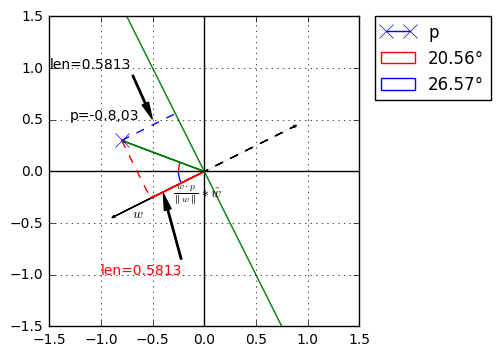

In [11]:
## Draw the figure

#  axis ranges
xaxis_range = (-1.5, 1.5)
yaxis_range = (0,0)
x = np.arange(*xaxis_range, 0.02)


# we are going to plot a lot of arrows,lets define some common options
arrow_opt = { 'head_width' : 0.02, 'head_length' : 0.03 , 'length_includes_head' : True}
plt.figure(1)
plt.subplot(111)

plt.ylim(*xaxis_range)
plt.xlim(*xaxis_range)

#Plot the point p
plt.plot(point[0],point[1], marker='x',markersize=10,label='p')

#Plots the weigh vector in both direction, thepositive solid the negative dashed
plt.arrow(0, 0,w_norm[0],w_norm[1], **arrow_opt)
plt.arrow(0, 0,-w_norm[0],-w_norm[1], **arrow_opt,linestyle='dashed',label ='w')

# Plot axiss
plt.plot(xaxis_range , yaxis_range,color='black') 
plt.plot(yaxis_range,xaxis_range ,color='black') 

#plot the point vector as a line from the origin to the cross p 
plt.arrow(0, 0, point[0], point[1], **arrow_opt,color='green')
# plot the margin as a vector  of length margin along the same direction of w
plt.arrow(0, 0, margin_vec[0], margin_vec[1], color = 'red', **arrow_opt    )

# Draw the main line
plt.plot(x,l1.m*x, color='green') 

plt.plot((point[0],p1[0] ),(point[1], p1[1]),color='blue',linestyle='dashed' ) 

plt.plot( (point[0], p2[0]), (point[1], p2[1])  ,color='red',linestyle='dashed'     )
      
Add_Annotations()
Add_Angles()

# Add legend,grid axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axes().set_aspect('equal')
plt.grid(True)
plt.show()
